In [15]:
import clearbox as cb
import clearbox.notebooks as nb # utility functions for notebook plotting
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

In [16]:
# Create some simple example data

features = np.asarray([
    [2.45, 1.31],
    [5.16, 1.31],
    [2.45, 3.35],
    [5.88, 3.72],
    [8.99, 3.35],
    [5.16, 5.73]
])

labels = np.asarray([0, 0, 0, 1, 1, 1])

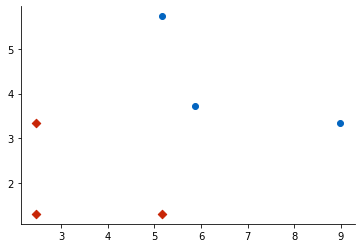

In [17]:
# Plot the data

xneg, xpos = features[labels == 0], features[labels == 1]

plt.scatter(xneg[:, 0], xneg[:, 1], color=nb.RED, marker='D')
plt.scatter(xpos[:, 0], xpos[:, 1], color=nb.BLUE, marker='o')

nb.clean()

In [4]:
from clearbox import svm

In [11]:
# Fit the simplest, non-kernel SVM, with basic gradient descent

model = svm.SVM(search=svm.projected_gd_search)

In [12]:
model.fit(features, labels, verbose=True, lr=0.01, max_its=1000, print_every=100)

iteration 0000: a [ 0.50707749 -0.09255848 -0.27358487  0.93343342  0.65011931  0.68078438], gradient norm 1.174 
iteration 0100: a [-1.  0.  0.  1.  1.  1.], gradient norm 2.0 
iteration 0200: a [-1.  0.  0.  1.  1.  1.], gradient norm 2.0 
iteration 0300: a [-1.  0.  0.  1.  1.  1.], gradient norm 2.0 
iteration 0400: a [-1.  0.  0.  1.  1.  1.], gradient norm 2.0 
iteration 0500: a [-1.  0.  0.  1.  1.  1.], gradient norm 2.0 
iteration 0600: a [-1.  0.  0.  1.  1.  1.], gradient norm 2.0 
iteration 0700: a [-1.  0.  0.  1.  1.  1.], gradient norm 2.0 
iteration 0800: a [-1.  0.  0.  1.  1.  1.], gradient norm 2.0 
iteration 0900: a [-1.  0.  0.  1.  1.  1.], gradient norm 2.0 


[2.45 8.99]
[-11.47472006 -21.89422395]


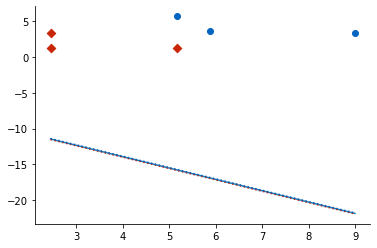

In [13]:
w, b = model.compute_primal_params(features, labels)

# Draw the decision boundary and the margins
x = features
x0s = np.asarray([x[:, 0].min(), x[:, 0].max()])
x1s = - (w[0] * x0s + b)/w[1]

x1s_neg = - (w[0] * x0s + b + 1)/w[1]
x1s_pos = - (w[0] * x0s + b - 1)/w[1]


print(x0s)
print(x1s)

# Plot the data

xneg, xpos = features[labels == 0], features[labels == 1]

plt.scatter(xneg[:, 0], xneg[:, 1], color=nb.RED, marker='D')
plt.scatter(xpos[:, 0], xpos[:, 1], color=nb.BLUE, marker='o')

nb.clean()

plt.plot(x0s, x1s)
plt.plot(x0s, x1s_neg, c=nb.RED, linestyle=':')
plt.plot(x0s, x1s_pos, c=nb.BLUE, linestyle=':')

In [ ]:
import torch
from torch import nn

torch.manual_seed(1)

c = 1
w, b = nn.Parameter( torch.randn((2, )) ), nn.Parameter( torch.zeros((1, )) )
# w, b = nn.Parameter( torch.tensor([0.0, 0.0]) ), nn.Parameter( torch.zeros((1, )) )
xt = torch.from_numpy(features)
yt = torch.from_numpy(labels) * 2 - 1

opt = torch.optim.SGD(lr = 0.001, params=[w, b], momentum=0.99)

zs = torch.zeros_like(yt)

In [ ]:
for i in range(1000):
    
    opt.zero_grad()
        
    loss = 0.5 * torch.dot(w, w) + c * torch.maximum(zs, 1 - ((w[None, :] * xt).sum(dim=1) + b[:, None]) * yt).sum()

    loss.backward()
    
    if i % 100 == 0:
        print(f'{i:3}: {w.data=}, {b.data=}, {torch.cat([w.grad, b.grad]).norm()}')
    
    opt.step()

In [ ]:
# Draw the decision boundary and the margins
x = features
x0s = np.asarray([x[:, 0].min(), x[:, 0].max()])

wn, bn = w.detach().numpy(), b.detach().numpy()
x1s = - (wn[0] * x0s + bn)/wn[1]

x1s_neg = - (wn[0] * x0s + bn + 1)/wn[1]
x1s_pos = - (wn[0] * x0s + bn - 1)/wn[1]

print(x0s)
print(x1s)
print(wn, bn)

h = 1000 # step nums in the mesh
xx1, xx2 = np.meshgrid(np.arange(x0s[0], x0s[1], (x0s[1] - x0s[0])/h),
                     np.arange(x1s[0], x1s[1], (x1s[1] - x1s[0])/h))

plane = lambda x1, x2 : np.concatenate([x1[:, None], x2[:, None]], axis=1).dot(wn) + bn

values = plane(xx1.ravel(), xx2.ravel())

values = values.reshape(xx1.shape)

# Plot the data
xneg, xpos = features[labels == 0], features[labels == 1]

plt.scatter(xneg[:, 0], xneg[:, 1], color=nb.RED, marker='D')
plt.scatter(xpos[:, 0], xpos[:, 1], color=nb.BLUE, marker='o')

plt.imshow(values, zorder=-1, extent=(x0s[0], x0s[1], x1s[1], x1s[0]), cmap='RdBu', vmin=-1, vmax=1, aspect='auto', alpha=0.2)

nb.clean()

plt.plot(x0s, x1s, c=nb.ORANGE)
plt.plot(x0s, x1s_neg, c=nb.RED, linestyle=':')
plt.plot(x0s, x1s_pos, c=nb.BLUE, linestyle=':')


[[0.26680972 0.09268956 0.35949928]]
[[5.16 1.31]
 [2.45 3.35]
 [5.88 3.72]]


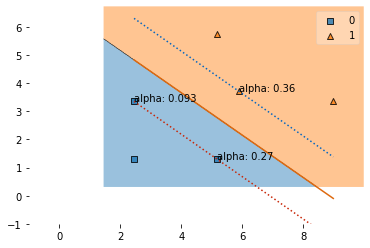

In [49]:
from sklearn.svm import SVC
from mlxtend.plotting import plot_decision_regions

x = features

model = SVC(kernel='linear', C=1)
model.fit(x, labels)

print(np.abs(model.dual_coef_))

print(model.support_vectors_)

ax = plot_decision_regions(X=features, y=labels, clf=model)

for coord, alpha in zip(model.support_vectors_, model.dual_coef_[0]):
    ax.text(x=coord[0], y=coord[1], s=f'alpha: {abs(alpha):.02}')
    
w = model.coef_[0]
b = model.intercept_

x1s = - (w[0] * x0s + b)/w[1]

x1s_neg = - (w[0] * x0s + b + 1)/w[1]
x1s_pos = - (w[0] * x0s + b - 1)/w[1]

plt.plot(x0s, x1s, c=nb.ORANGE)
plt.plot(x0s, x1s_neg, c=nb.RED, linestyle=':')
plt.plot(x0s, x1s_pos, c=nb.BLUE, linestyle=':')

nb.clean()
plt.xlim(left=-1)
plt.ylim(bottom=-1)

plt.savefig('svm.pdf')
